# Kaggle Competition - Data analysis & Model selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from process_fun import *
from train_fun import *

from sklearn.model_selection import train_test_split

## 1. Analyze data

In [2]:
d_train = pd.read_csv("../input/diamonds-datamad0320/diamonds_train.csv")
d_test = pd.read_csv("../input/diamonds-datamad0320/diamonds_test.csv")

In [3]:
d_test.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56


In [4]:
d_train.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103


In [5]:
print('Shape: ', d_train.shape)
print('Info: ', d_train.info())

Shape:  (40345, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40345 non-null  int64  
 1   carat       40345 non-null  float64
 2   cut         40345 non-null  object 
 3   color       40345 non-null  object 
 4   clarity     40345 non-null  object 
 5   depth       40345 non-null  float64
 6   table       40345 non-null  float64
 7   x           40345 non-null  float64
 8   y           40345 non-null  float64
 9   z           40345 non-null  float64
 10  price       40345 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB
Info:  None


In [6]:
d_train.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [7]:
d_train.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,20172.000000,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,11646.742642,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10086.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,20172.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,30258.000000,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,40344.000000,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


In [8]:
d_train['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
40340    40340
40341    40341
40342    40342
40343    40343
40344    40344
Name: Unnamed: 0, Length: 40345, dtype: int64

#### --> Seems that 'Unnamed: 0' is a index columns, that won't be useful.

In [9]:
d_train.drop(columns=['Unnamed: 0'],inplace=True)
d_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


### 1.1. Examine non-numeric columns

--> Depending on the diamond cut it would reflect more or less ligth. It has a direct impact on the price [source](https://www.brilliance.com/education/diamonds/cut)

In [10]:
d_train.cut.value_counts()

Ideal        16090
Premium      10339
Very Good     9036
Good          3694
Fair          1186
Name: cut, dtype: int64

In [11]:
d_train.groupby('cut').agg(['min','mean','max']).price.sort_values(by='mean')

,min,mean,max
cut,,,
Ideal,326,3449.843816,18806
Good,335,3904.176232,18788
Very Good,336,3963.129150,18818
Fair,337,4377.750422,18574
Premium,326,4583.088016,18797


--> Dimands are categorized by de alphabet letters depending on how dark is thsir color. Being `D` colorless and `J` near yellow: [source](https://en.wikipedia.org/wiki/Diamond_color)

In [12]:
d_train.color.value_counts()

G    8499
E    7351
F    7130
H    6234
D    5074
I    4023
J    2034
Name: color, dtype: int64

In [13]:
d_train.groupby('color').agg(['min','mean','max']).price.sort_values(by='mean')

,min,mean,max
color,,,
E,326,3101.672698,18731
D,357,3198.432203,18693
F,342,3733.193128,18784
G,354,3984.466761,18818
H,337,4438.723933,18803
I,336,5044.441959,18797
J,335,5330.246804,18710


--> Clarity also has an impact in the price of the diamond. Beig more clear more expensive: [source](https://www.bluenile.com/education/diamonds/clarity)

In [14]:
d_train.clarity.value_counts()

SI1     9751
VS2     9178
SI2     6828
VS1     6101
VVS2    3858
VVS1    2714
IF      1362
I1       553
Name: clarity, dtype: int64

In [15]:
d_train.groupby('clarity').agg(['min','mean','max']).price.sort_values(by='mean')

,min,mean,max
clarity,,,
VVS1,336,2519.588430,18682
IF,369,2859.307636,18806
VVS2,354,3291.981337,18768
I1,345,3758.650995,16538
VS1,340,3815.384691,18795
VS2,337,3913.506646,18779
SI1,326,3993.459953,18818
SI2,326,5077.594610,18788


### --> All non-numeric columns seem valuable. Must be converted to numerical data

First I used encoder to transform all the nnon umeric values to numeric ones. But it uses random assigantion and the non-numeric qualities ar highly correalted with the price so they shoudl be assigned to numeric values using an specific order

In [16]:
#to_num(d_train)

So based o the info I got, I transformed the valuesto numeric manually to control them

In [17]:
# Replacing non-numeric to numeric:
cutlis=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
to_num_con(d_train, 'cut', cutlis)

colorlis = ['J','I','H','G','F','E','D']
to_num_con(d_train, 'color', colorlis)

clalis = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
to_num_con(d_train, 'clarity', clalis) 

d_train.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,5,3,4,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,3,7,6,64.0,56.0,4.14,4.17,2.66,532
2,0.42,4,5,5,61.2,58.0,4.86,4.82,2.96,1103


In [18]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  int64  
 2   color    40345 non-null  int64  
 3   clarity  40345 non-null  int64  
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.1 MB


### 1.2. Examine all numeric columns

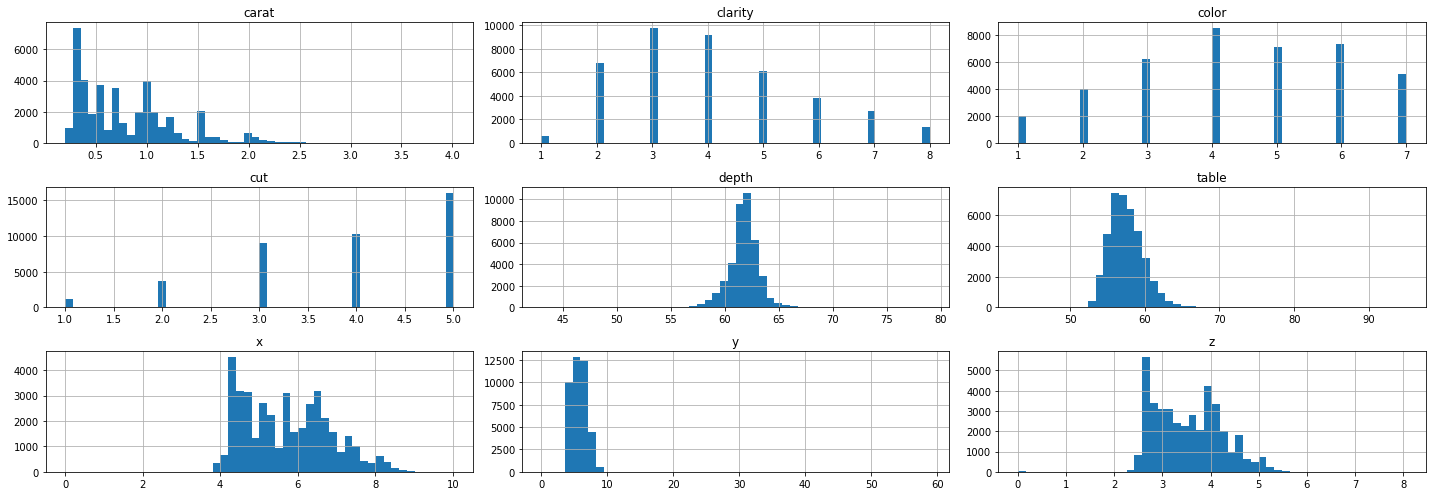

In [19]:
d_train.drop(columns=['price']).hist(figsize=(20, 7), bins=50)
plt.tight_layout()

In [20]:
correlation_map = d_train.corr(method='pearson')

In [21]:
outliers = d_train.iloc[list(d_train[d_train['y'] < d_train['y'].mean() - (3 * d_train['y'].std())].index)]
outliers

,carat,cut,color,clarity,depth,table,x,y,z,price
6571,1.56,5,4,4,62.2,54.0,0.0,0.0,0.0,12800
15252,1.20,4,7,7,62.1,59.0,0.0,0.0,0.0,15686
23417,0.71,2,5,2,64.1,60.0,0.0,0.0,0.0,2130
24641,1.14,1,4,5,57.5,67.0,0.0,0.0,0.0,6381
25671,2.25,4,3,2,62.8,59.0,0.0,0.0,0.0,18034
40203,1.00,3,3,4,63.3,53.0,0.0,0.0,0.0,5139


Seem to be some outliers in `x`, `y` and `z`, but as  don't know shat they mean not going to take them now. 

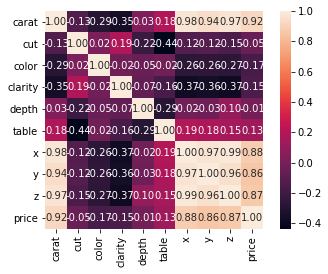

In [22]:
sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', 
            yticklabels=d_train.columns, xticklabels=d_train.columns)

The columns `x`, `y`and `z`seemt to be highly correlated between them and with carat, wich measn that they migth be ralted with the size. 

Also all of them seem to have the hgiher correlation with `price`. So maybe make sens to explore modesl of pndeerated correlation.

### 1.3 Split data to work with it

In [23]:
X = d_train.drop(columns=['price'])
y = d_train.price

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Treat data

Apply the same tratme to to the test dataset

In [25]:
d_test.drop(columns=['Unnamed: 0'],inplace=True)

cutlis=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
to_num_con(d_test, 'cut', cutlis)

colorlis = ['J','I','H','G','F','E','D']
to_num_con(d_test, 'color', colorlis)

clalis = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
to_num_con(d_test, 'clarity', clalis) 

display(d_test.info())
d_test.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13449 entries, 0 to 13448
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13449 non-null  float64
 1   cut      13449 non-null  int64  
 2   color    13449 non-null  int64  
 3   clarity  13449 non-null  int64  
 4   depth    13449 non-null  float64
 5   table    13449 non-null  float64
 6   x        13449 non-null  float64
 7   y        13449 non-null  float64
 8   z        13449 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 945.8 KB


None

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,5,3,2,60.0,56.0,4.41,4.43,2.65
1,0.34,5,7,8,62.1,57.0,4.52,4.46,2.79
2,1.57,3,2,4,60.3,58.0,7.58,7.55,4.56


## 3. Select model

Make a test with Lineas Regression model:

* This model has a score of 1276.09720 in the leader board

In [26]:
from sklearn.linear_model import LinearRegression

lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
ly_pred = lmodel.predict(X_test)

In [28]:
cv_tes = cross_val_score(lmodel, X_train, y_train,cv=2, scoring='r2')
cv_tes.mean()

0.9081538298656593

In [29]:
mean_squared_error(y_test,ly_pred)

1360457.8331333764

### 3.1 Explore the best model:
Now lets chek other regression models to check wich one has better restults

#### 3.1.1 With non-standarized data

In [30]:
m = models(pipelines, X_train, y_train)
m

,model,r2,mse
0,LinearRegression,0.907937,-1466794.221493
1,Lasso,0.908012,-1465503.990449
2,RandomForestRegressor,0.980118,-315404.647980
3,KNeighborsRegressor,0.947913,-831144.289857
4,DecisionTreeRegressor,0.964181,-572772.912916
5,GradientBoostingRegressor,0.975176,-395982.897421


#### 3.1.2   With standarized data

In [31]:
sm = models(stpipelines, X_train, y_train)
sm

,model,r2,mse
0,ScaledLR,0.907937,-1466794.221493
1,ScaledLASSO,0.908015,-1465471.506683
2,ScaledRF,0.980243,-316948.649232
3,ScaledKNN,0.963739,-578538.631361
4,ScaledCART,0.963958,-562057.650142
5,ScaledGBM,0.975219,-396360.590154


#### 3.1.2   With standarized data exclusively linear models

In [32]:
lm = models(lpipelines, X_train, y_train)
lm

,model,r2,mse
0,S-LinearSVR,0.833507,-2656877.807293
1,S-Ridge,0.907938,-1466765.954339


Comapre all tested models and get the 3 best scored

In [34]:
bdf = pd.concat([sm,lm])
bdf['r2'] = pd.to_numeric(bdf['r2'])
bdf['mse'] = pd.to_numeric(bdf['mse'])

bdf.nlargest(4,'r2')

,model,r2,mse
2,ScaledRF,0.980243,-316948.649232
5,ScaledGBM,0.975219,-396360.590154
4,ScaledCART,0.963958,-562057.650142
3,ScaledKNN,0.963739,-578538.631361
